## Biomedical images

This lab aims for the students to become familiar with image manipulation and representation techniques such as histogram manipulation, or filters, convolutions and fourier transforms.

### Part 1: Histogram and filters

The first part of this script focuses on loading an image, manipulating its histogram, and showing it on screen.

To do so, we will need the following python libraries:


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.ndimage as ndimage


These are used for the following:

-   `matplotlib.pyplot` offers reading, writting, and display options for images and plots. This will be useful to show the images on screen.
-   `numpy` is the number one most used library on python for working with arrays, vectors, and numbers altogether, which we'll need to manipulate images.
-   `cv2`, or `opencv-python`, is a huge library for image and video manipulation, which provides tons of filters and transformations easy to use.
-   `scipy.ndimage` is also a library for image manipulation with filters, transformations and other tools.

An important consideration that must be taken into account when using `opencv-python` is that this library (for optimization reasons) displays colors in a BGR (Blue, Green, Red) form, in contrast with the RGB form most applications use nowadays.

Let us start by loading two images we'll use as examples for our code:


In [3]:
berkeley = plt.imread("image_examples/BerkeleyTower.png")
cameraman = plt.imread("image_examples/cameraman.tif")

These images will already be in RGB. We can show both images by running `matplotlib`'s `pyplot.imshow()`.


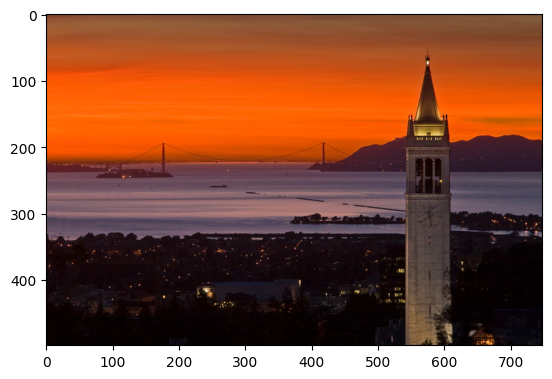

In [4]:
plt.imshow(berkeley)
plt.show()


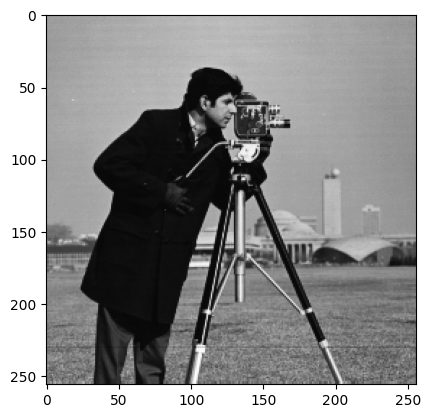

In [5]:
plt.imshow(cameraman, cmap="gray", vmin=0, vmax=255)
plt.show()

Note that the `cameraman.tif` image has a single channel, and as such needs a colormap (`cmap`) to be defined when showing it on screen. By default, all images with a single channel can be thought to be gray-scale images.

The `vmin` and `vmax` parameters determine which is the minimum and maximum values the pixels in the image can take.

To get a grasp of how images are encoded, we can split the channels of a colored image and display them side-by-side.


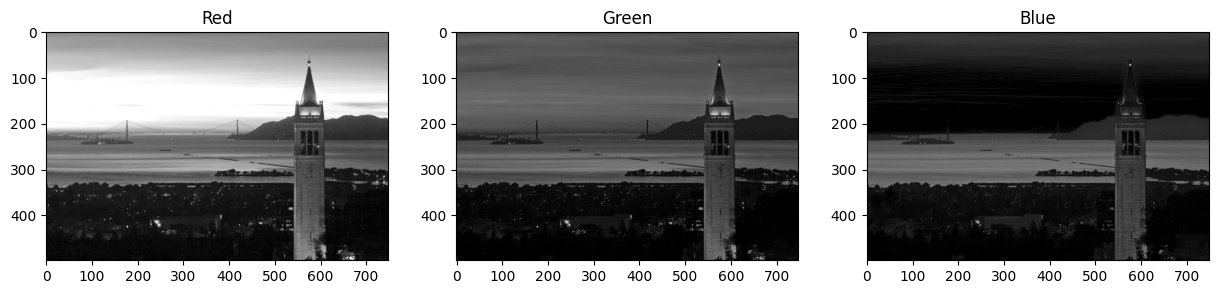

In [6]:
red = berkeley[:, :, 0]
green = berkeley[:, :, 1]
blue = berkeley[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red, cmap="gray", vmin=0, vmax=1)
ax[0].set_title("Red")
ax[1].imshow(green, cmap="gray", vmin=0, vmax=1)
ax[1].set_title("Green")
ax[2].imshow(blue, cmap="gray", vmin=0, vmax=1)
ax[2].set_title("Blue")

plt.show()

Different colormaps may be used to convey the color information easier.


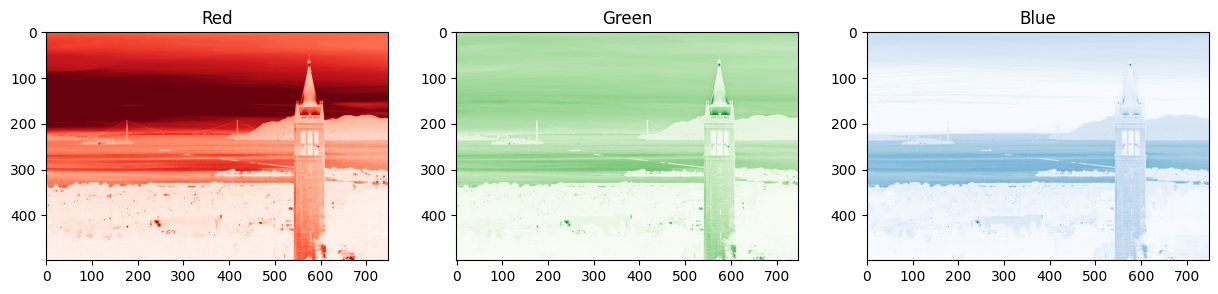

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red, cmap="Reds", vmin=0, vmax=1)
ax[0].set_title("Red")
ax[1].imshow(green, cmap="Greens", vmin=0, vmax=1)
ax[1].set_title("Green")
ax[2].imshow(blue, cmap="Blues", vmin=0, vmax=1)
ax[2].set_title("Blue")

plt.show()

One can even convert colored images to gray-scale by different methods. The most easy is by averaging the intensity value over the color axis. This means performing the following calculation over all the pixels on the image:

$$
    GS_{ij} = \frac{1}{3}(R_{ij} + G_{ij} + B_{ij})
$$

Keep an eye on the shape of the image's matrix before and after the calculation.


Shape before: (499, 748, 3)
Shape after: (499, 748)


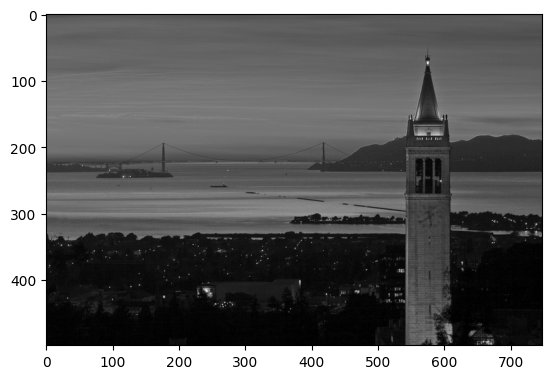

In [8]:
print("Shape before:", berkeley.shape)
gray = np.average(berkeley, axis=2)
print("Shape after:", gray.shape)

plt.imshow(gray, cmap="gray", vmin=0, vmax=1)
plt.show()

Note that different ways to make this conversion exist. For instance, the luminance of an image (also gray-scale) gives different importance to the three channels of the image:

$$
    L_{ij} = \frac{1}{3}(0.2126\cdot R_{ij} + 0.7152\cdot G_{ij} + 0.0722\cdot B_{ij})
$$


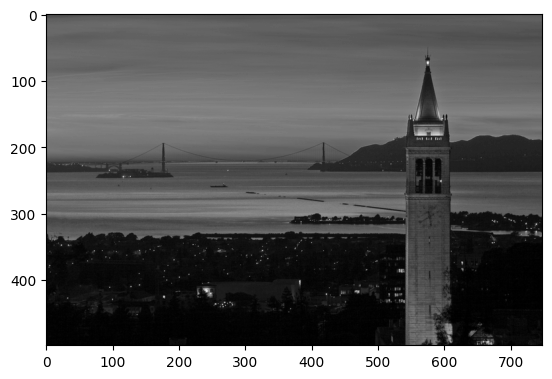

In [9]:
luminance = 0.2126 * red + 0.7152 * green + 0.0722 * blue

plt.imshow(luminance, cmap="gray", vmin=0, vmax=1)
plt.show()

`opencv` comes with some builtin functions that makes this step easier and more intuitive:


Shape before: (499, 748, 3)
Shape after: (499, 748)


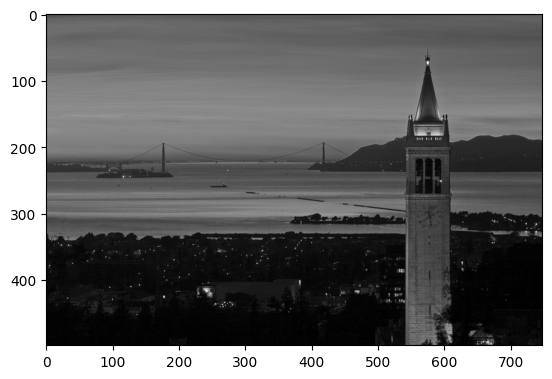

In [10]:
print("Shape before:", berkeley.shape)
gray = cv2.cvtColor(berkeley, cv2.COLOR_RGB2GRAY)
print("Shape after:", gray.shape)

plt.imshow(gray, cmap="gray", vmin=0, vmax=1)
plt.show()

The histogram of this image can be computed by running over all the pixels on the gray-scale image and counting how many times each of the values appear. This can be done with a single `scipy.ndimage` function:


In [11]:
hist = ndimage.histogram(gray, 0, 1, 256)


Which takes the following inputs:

-   The `input` image for which to construct the histogram
-   The `minimum` value of the image pixels
-   The `maximum` value of the image pixels
-   The `bin count`

Note that the image max and min values were set to 0 and 1, which must be done like this, because `opencv` also normalizes the image pixels to a floating point number between 0 and 1, which is a very common way of encoding images.


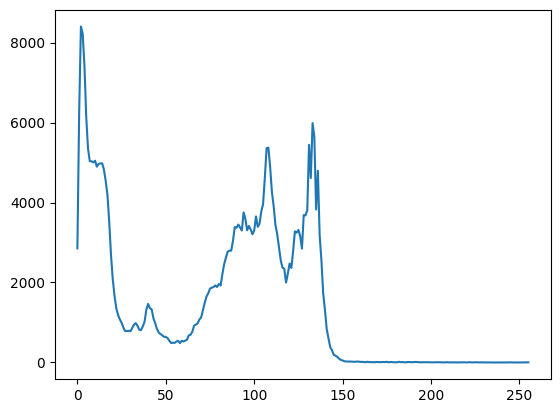

In [12]:
plt.plot(hist)
plt.show()


It becomes obvious in this histogram that the gray-scale image of berkeley tower has a larger ammount of dimmer colors rather than lighter colors. One type of histogram manipulation can be cathegorized under linear transformations, for instance, rescaling all of the image pixels (values from 0 to 1) to another range of values:


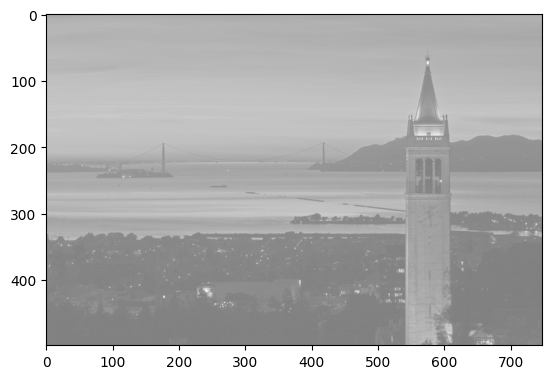

In [13]:
linear_eq = np.interp(gray, (gray.min(), gray.max()), (0.5, 1))

plt.imshow(linear_eq, cmap="gray", vmin=0, vmax=1)
plt.show()

See how the histogram changed:


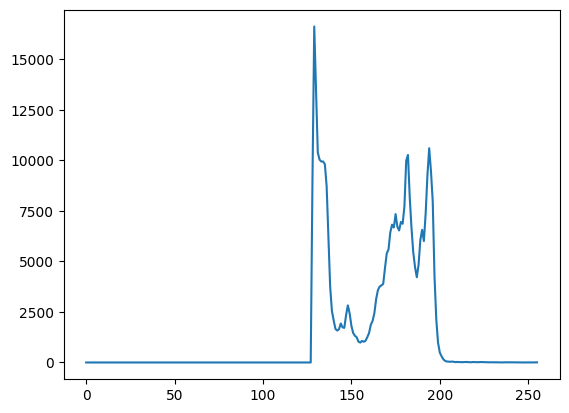

In [14]:
hist = ndimage.histogram(linear_eq, 0, 1, 256)

plt.plot(hist)
plt.show()


This is still not equalized, but one can play a bit with the numbers on the `np.interp` function, which provides an easy way of manipulating with linear transformations the histogram, to try to equalize it a bit.

Looking into the original histogram, most of the pixels present a value under 150 (over 255, which means a value of 150/255 = 0.58823529411 on the normalized image). We can then transform the image with the following:


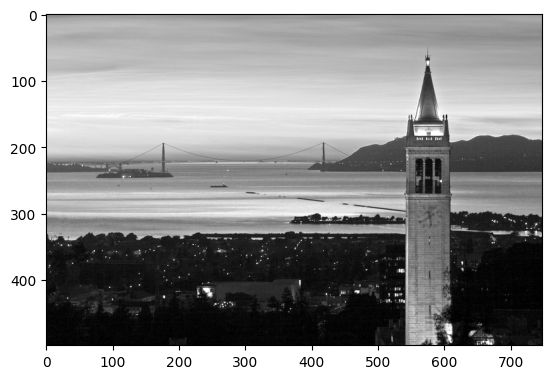

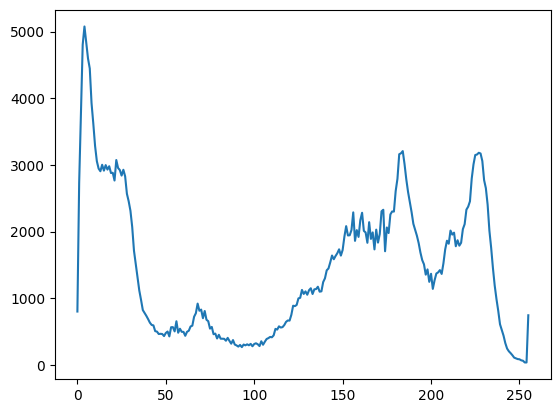

In [15]:
linear_eq = np.interp(gray, (0, 0.58823529411), (0, 1))

plt.imshow(linear_eq, cmap="gray", vmin=0, vmax=1)
plt.show()

hist = ndimage.histogram(linear_eq, 0, 1, 256)
plt.plot(hist)
plt.show()

This clearly improved the histogram of this image, however, it's not still equalized. This can be done with the following steps:

Note that, for the sake of simplicity, we go back to the `uint8` (0 to 255) values for the image pixels.

To start, one must compute the original histogram of the image:


In [16]:
grayUint8 = np.uint8(gray * 255)
hist = ndimage.histogram(grayUint8, 0, 255, 256)


Then one has to compute the cumulative sum of the histogram. This is equal to counting "how many pixels exist with a gray-scale value equal or lower to x":

$$
    cumsum(i) = \sum^i_{j=0} hist_j
$$


In [17]:
cumsum = np.cumsum(hist)


To compare, let us plot the histogram and cumsum back-to-back:


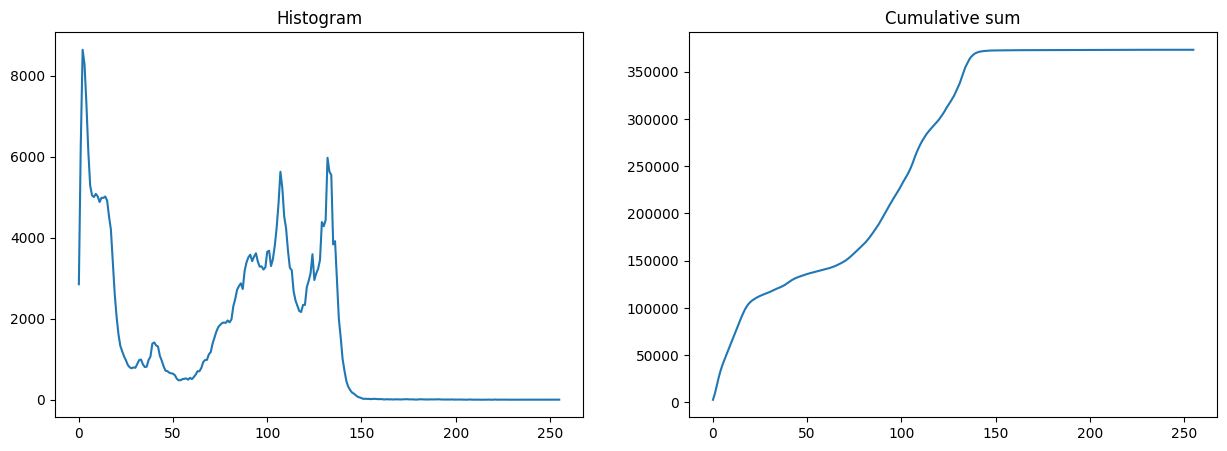

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(hist)
ax[0].set_title("Histogram")
ax[1].plot(cumsum)
ax[1].set_title("Cumulative sum")

plt.show()

Finaly, the new value for the pixel $GS_{ij}$ will be set by normalizing the cumsum from 0 to 255, taking the old value of the pixel and running it through the cumsum function:

$$
    EQ_{ij} = \frac{1}{M} cumsum(GS_{ij})
$$

Where M is the pixel count of the image:

$$
    M=shape_x \times shape_y
$$


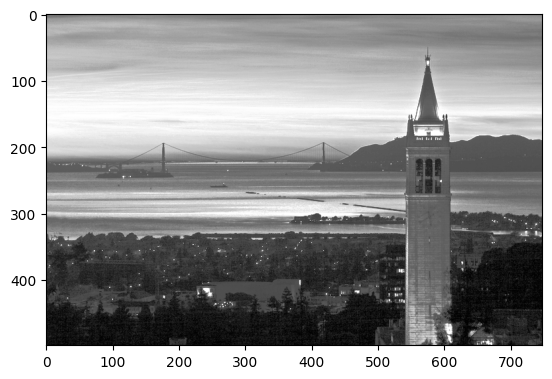

In [19]:
eq = cumsum[grayUint8] * 255 / grayUint8.size

plt.imshow(eq, cmap="gray", vmin=0, vmax=255)
plt.show()

To show the strength of these methods, let us repeat this equalization with the image "Unequalized_Hawkes_Bay_NZ.jpg", which is strongly unequalized:


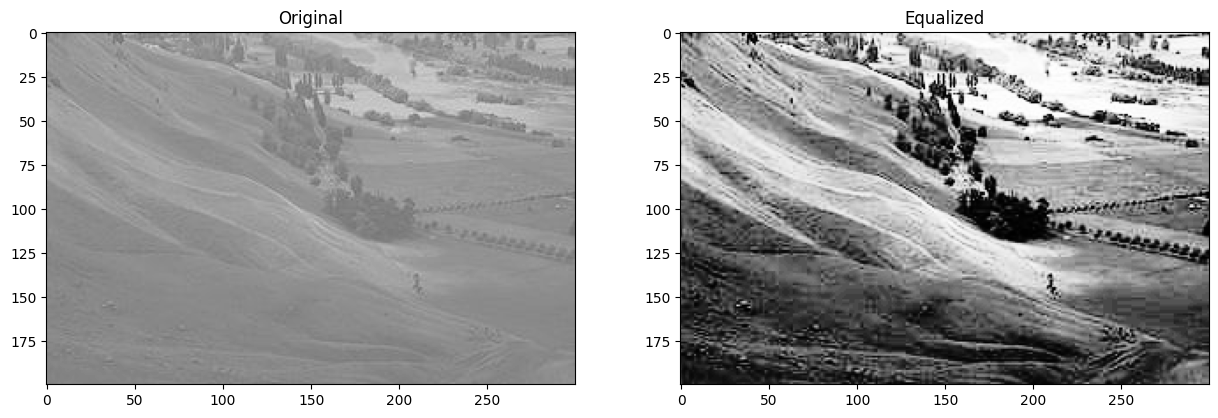

In [20]:
hawkes = plt.imread("image_examples/Unequalized_Hawkes_Bay_NZ.jpg")  # Already in grayscale

eq = np.uint8(np.cumsum(ndimage.histogram(hawkes, 0, 255, 256)) * 255 / hawkes.size)[hawkes]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(hawkes, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].imshow(eq, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Equalized")

plt.show()

Let us show how the histogram changed:


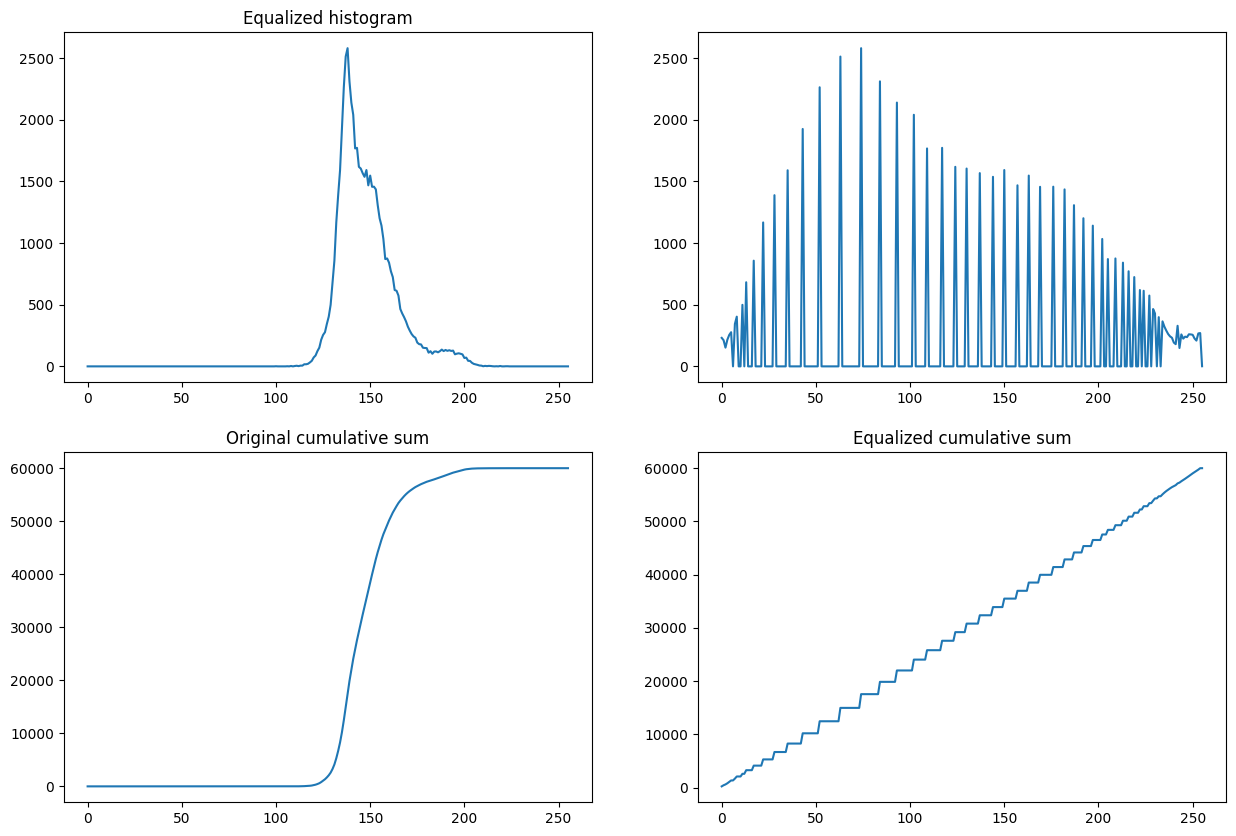

In [21]:
hist = ndimage.histogram(hawkes, 0, 255, 256)
new_hist = ndimage.histogram(eq, 0, 255, 256)
cumsum = np.cumsum(hist)
new_cumsum = np.cumsum(new_hist)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].plot(hist)
ax[0, 0].set_title("Original histogram")
ax[1, 0].plot(cumsum)
ax[1, 0].set_title("Original cumulative sum")
ax[0, 1].plot(new_hist)
ax[0, 0].set_title("Equalized histogram")
ax[1, 1].plot(new_cumsum)
ax[1, 1].set_title("Equalized cumulative sum")

plt.show()

This last image is perfect to show what equalizing the histogram means.it just tries to make the cumulative sum a straight increasing line (which is equivalent to making the histogram a straight flat line).

Let us now show another type of image manipulation: **filters**. Filters are algorithms that _filter out_ parts of the image. For instance, if an image has a lot of noise, a low-pass filter might reduce this ammount of noise by removing the frequencies corresponding to it from the fourier transform of the image.

A way of applying this sort of filter is by adding a "blur" to the image. This is: running over all the image and "difusing" the values over their neighbors. A simple way of doing so is by computing the convolution of the image with a set kernel (in this following case a 3x3 matrix with ones everywhere, but normalized):


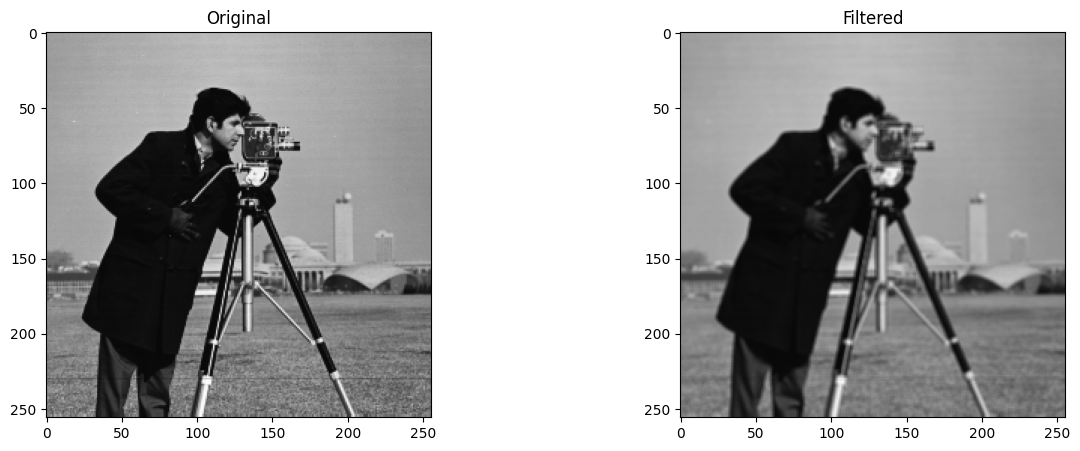

In [22]:
kernel = np.ones((3, 3)) / 9

filtered = ndimage.convolve(cameraman, kernel)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].imshow(filtered, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")

plt.show()

Note how this filter blurred out the image. However, a more common filter to use is a gaussian filter, giving more importance to the center of the kernel. Let us show an example:


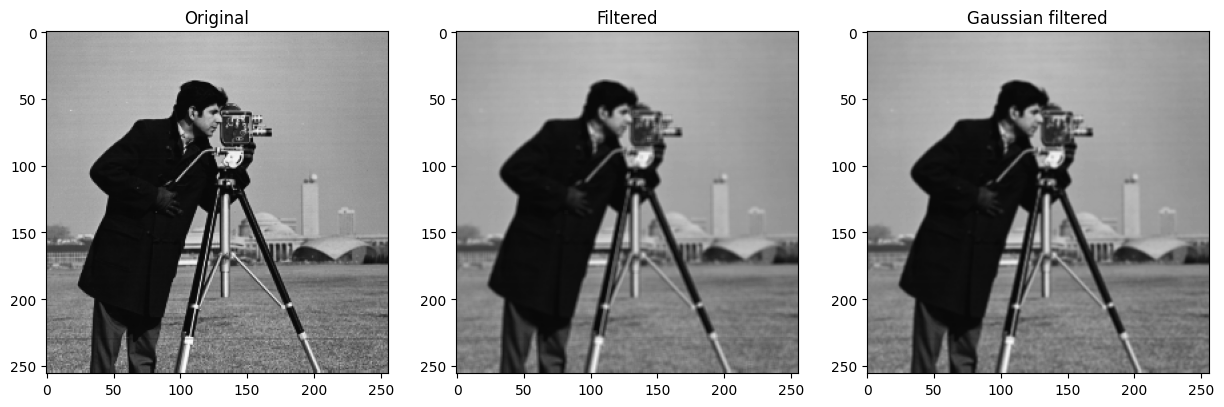

In [23]:
gaussian_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

filtered_gaussian = ndimage.convolve(cameraman, gaussian_filter)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].imshow(filtered, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")
ax[2].imshow(filtered_gaussian, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Gaussian filtered")

plt.show()

A high-pass filter might be applied to identify the edges and corners of an image, and can be done also in a convolution-way such as the following:


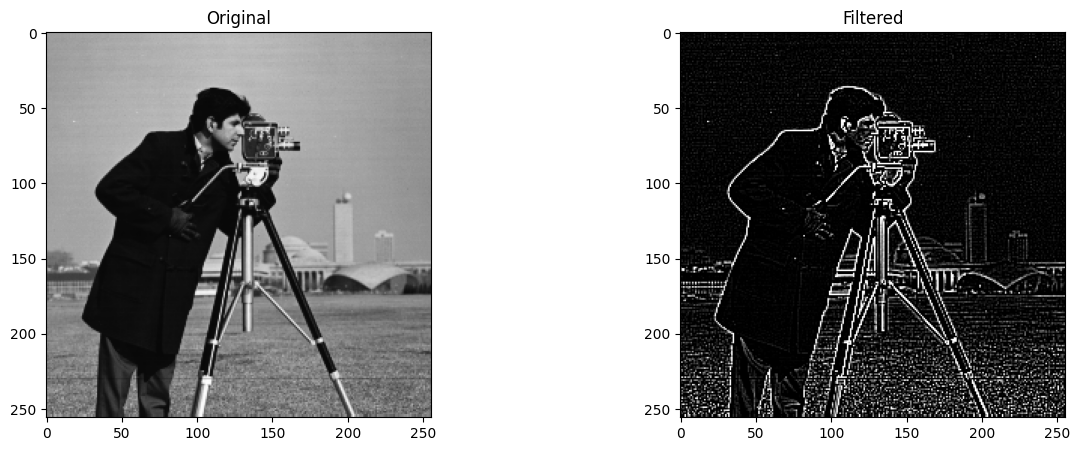

In [24]:
high_pass = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

filtered_high_pass = np.zeros_like(cameraman, dtype=np.int32)
ndimage.convolve(cameraman, high_pass, output=filtered_high_pass)
filtered_high_pass = np.clip(filtered_high_pass, 0, 255)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].imshow(filtered_high_pass, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")

plt.show()

Note that additional steps were taken before and after applying the filter. This is because this filter has the possibility for the result to have negative values, as well as values above the maximum for the unsigned integer type typically used for image (values ranging from 0 to 255). To correct for that, the result image was created as a `np.int32` type, which accepts both negative values and values above 255. Then, all the values were clipped to the intended range (0 to 255).

Filters can also be used to detect edges on a given axis. For instance, the following code extracts only the vertical edges:


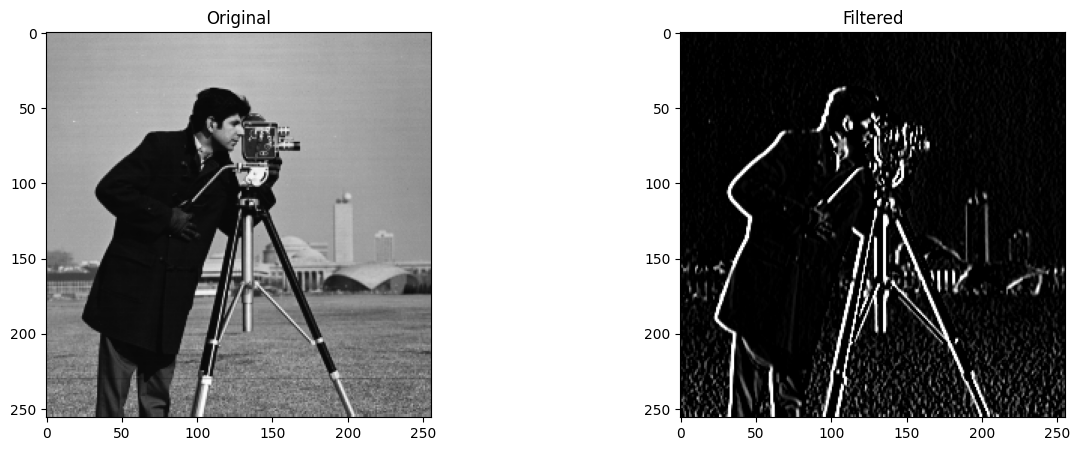

In [25]:
vertical_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

filtered_vertical = np.zeros_like(cameraman, dtype=np.int32)
ndimage.convolve(cameraman, vertical_kernel, output=filtered_vertical)
filtered_vertical = np.clip(filtered_vertical, 0, 255)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].imshow(filtered_vertical, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")

plt.show()

Compare it with the following kernel that does the same:


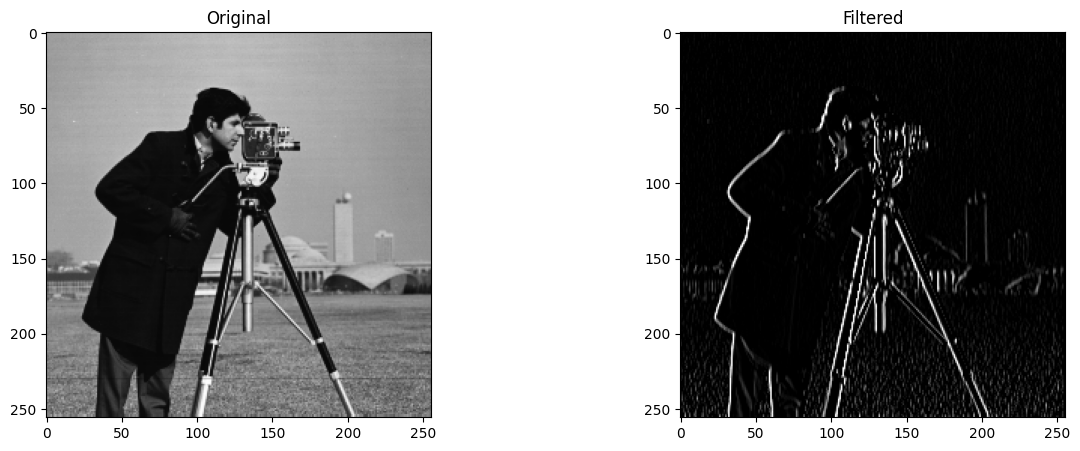

In [26]:
vertical_kernel = np.array([[-1, 1, 0], [-1, 1, 0], [-1, 1, 0]])

filtered_vertical = np.zeros_like(cameraman, dtype=np.int32)
ndimage.convolve(cameraman, vertical_kernel, output=filtered_vertical)
filtered_vertical = np.clip(filtered_vertical, 0, 255)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].imshow(filtered_vertical, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")

plt.show()

This shows that multiple filters might do the same, and depending on the original image and the objective of the filtering, one or the other might be used.

There exists a type of noise known as _salt and pepper_ as a nod to the appearence of the image when this sort of noise is present. It consists of a random ammout of pixels that are set to the maximum / minimum value of the image caused by malfunctions on the detection, for example.

The following code aims to recreate this type of noise:


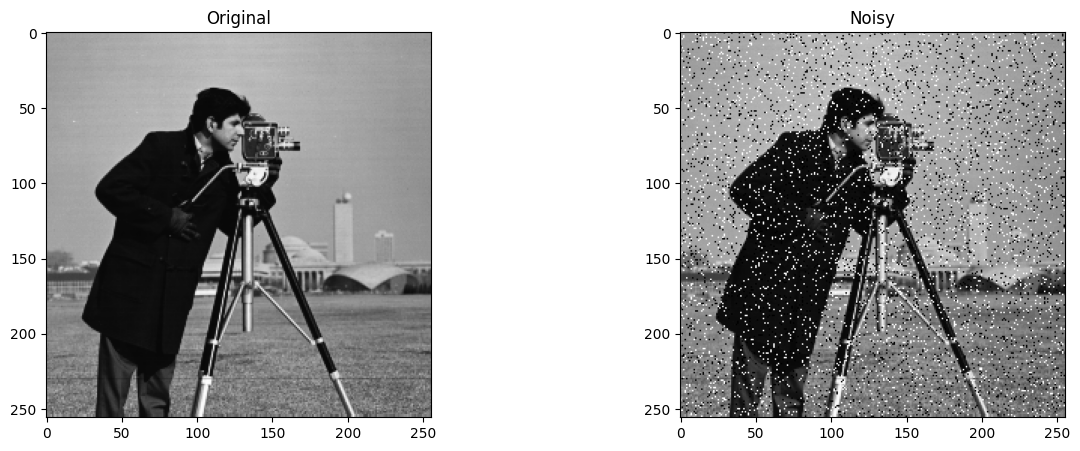

In [27]:
salt_and_pepper = np.random.rand(*cameraman.shape)
noisy = cameraman.copy()
noisy[salt_and_pepper < 0.05] = 0
noisy[salt_and_pepper > 0.95] = 255

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].imshow(noisy, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Noisy")

plt.show()

Note the resemblance of this sort of distortion with its name, _salt and pepper_. The first instinct to correct this sort of noise would be to apply a low-pass filter such as a gaussian filter. This, however does not solve the problem, as it is seen in the following example.

A more suitable filtering method consists on running over all the image and taking the local median (analyzing the neighborhood of all the pixels, given a kernel, and taking the median):


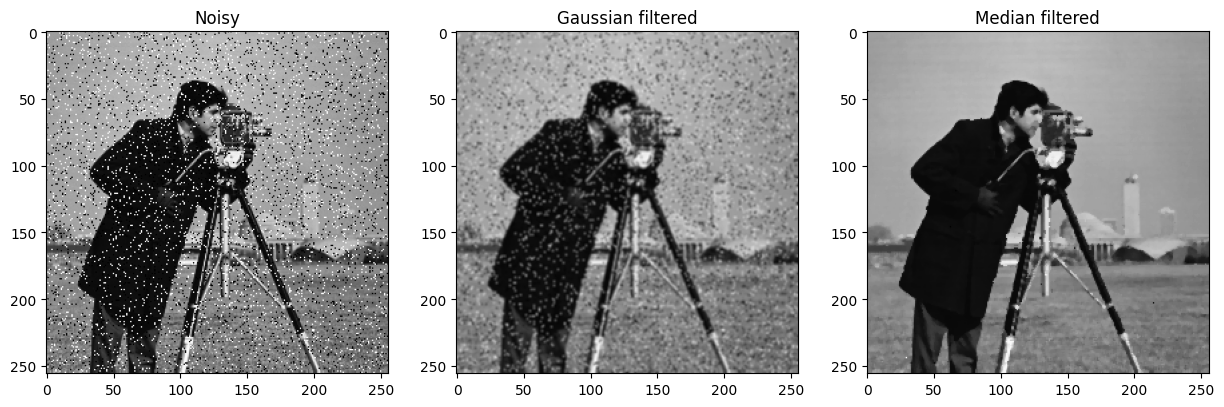

In [28]:
gaussian_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

filtered_gaussian = ndimage.convolve(noisy, gaussian_filter)

filtered_median = ndimage.median_filter(noisy, size=3)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(noisy, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Noisy")
ax[1].imshow(filtered_gaussian, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Gaussian filtered")
ax[2].imshow(filtered_median, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Median filtered")

plt.show()

Note that the noise has been pretty much removed from the image. We can study how much of this noise is this filter able to remove depending on the kernel size and the ammount of noise:


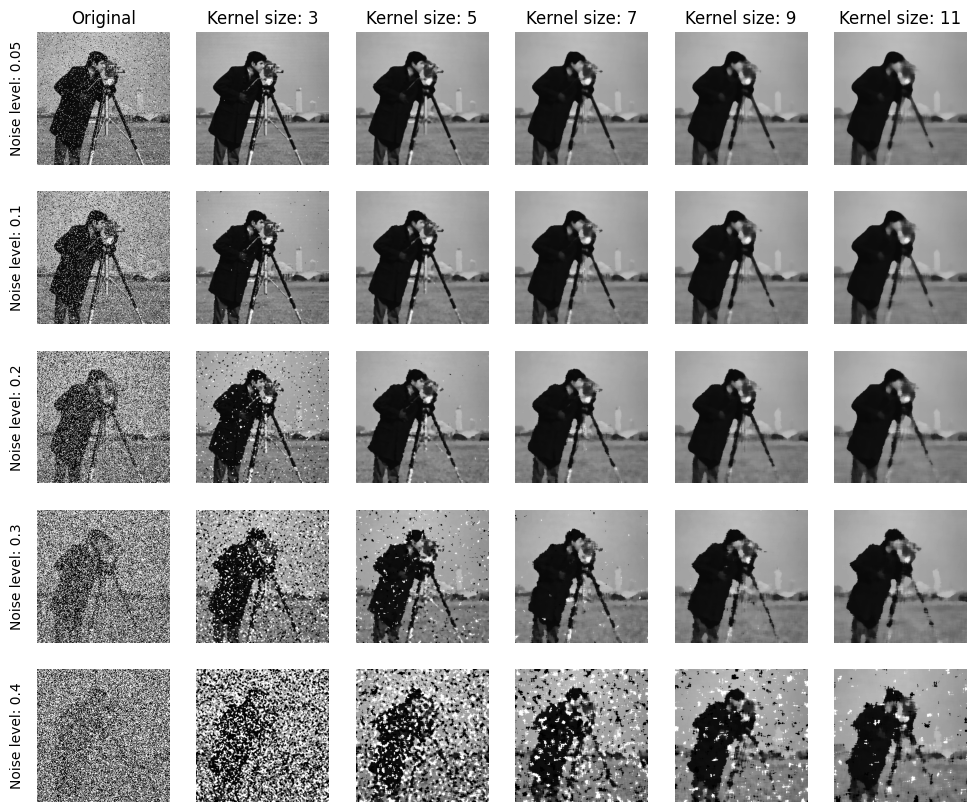

In [29]:
noise_levels = [0.05, 0.1, 0.2, 0.3, 0.4]
kernel_sizes = [0, 3, 5, 7, 9, 11]

fig, ax = plt.subplots(len(noise_levels), len(kernel_sizes), figsize=(12, 10))

for i, noise_level in enumerate(noise_levels):
    for j, kernel_size in enumerate(kernel_sizes):
        noisy = cameraman.copy()
        salt_and_pepper = np.random.rand(*cameraman.shape)
        noisy[salt_and_pepper < noise_level] = 0
        noisy[salt_and_pepper > 1 - noise_level] = 255
        if kernel_size == 0:
            filtered = noisy
        else:
            filtered = ndimage.median_filter(noisy, size=kernel_size)
        ax[i, j].imshow(filtered, cmap="gray", vmin=0, vmax=255)
        ax[i, j].axis("off")


# Add titles to the first row
for j, kernel_size in enumerate(kernel_sizes):
    if kernel_size == 0:
        ax[0, j].set_title("Original")
    else:
        ax[0, j].set_title("Kernel size: {}".format(kernel_size))

# Add titles to the first column
for i, noise_level in enumerate(noise_levels):
    ax[i, 0].text(
        -0.15,
        0.5,
        "Noise level: {}".format(noise_level),
        rotation=90,
        va="center",
        ha="center",
        transform=ax[i, 0].transAxes,
    )


plt.show()

Note that this filter reduces correctly nearly every case of salt and pepper noise that was tested. However, when having a larger kernel size than needed, information might be lost (see the first row of the image as an example, where a kernel size of 3 was able to correct the noise, and having a bigger kernel size did not improve the image, but it made it worse).


### Part 2: Raw images

In [30]:
def load_raw(filename, shape=(512, 512), dtype=np.uint8):
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=dtype, count=np.prod(shape))
    return data.reshape(shape)

Let us first try and load an image:

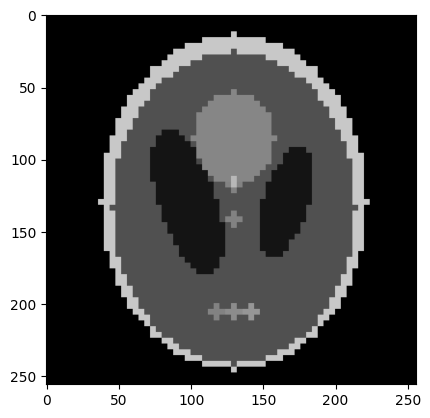

In [31]:
raw = load_raw("biomed_images/BRAIN.RAW", shape=(256, 256))

plt.imshow(raw, cmap="gray", vmin=0, vmax=255)
plt.show()

TODO: Find size of black ellipses.

#### Equalization

We shall now try to equalize image `ART1BIO.RAW`, which is the following image:

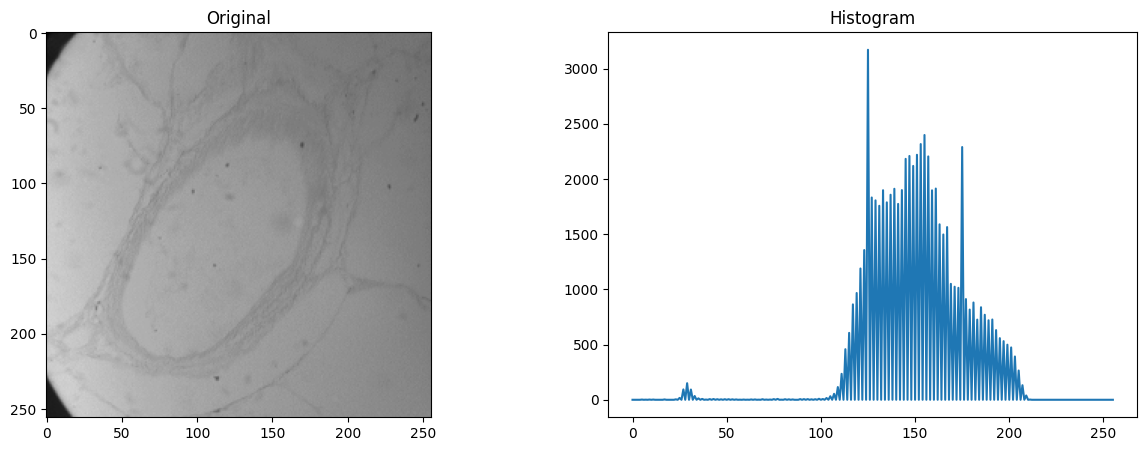

In [36]:
raw = load_raw("biomed_images/ART1BIO.RAW", shape=(256, 256))
hist = ndimage.histogram(raw, 0, 255, 256)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(raw, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[1].plot(hist)
ax[1].set_title("Histogram")

plt.show()

This image is clearly not equalized. Let us first equalize it as shown before:

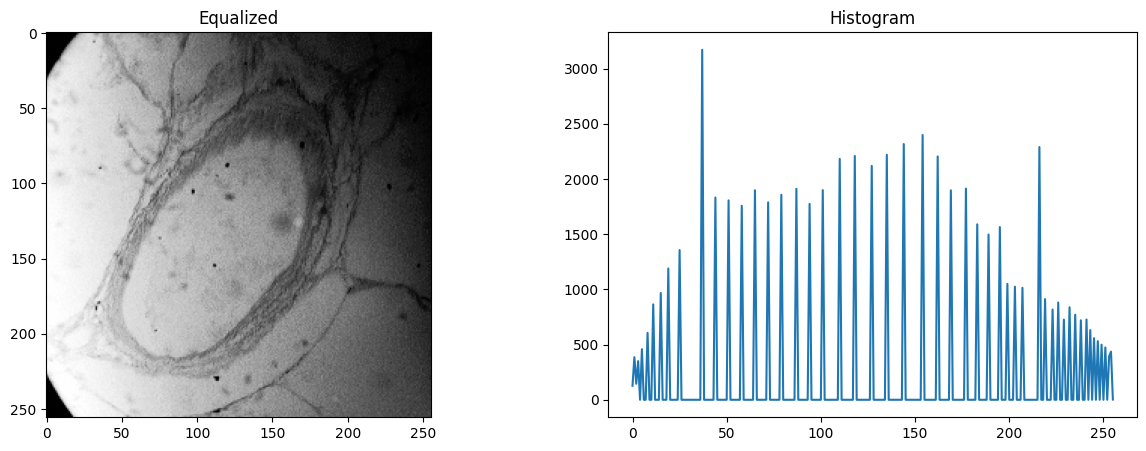

In [44]:
eq = np.uint8(np.cumsum(hist) / np.sum(hist) * 255)[raw]

new_hist = ndimage.histogram(eq, 0, 255, 256)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(eq, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Equalized")
ax[1].plot(new_hist)
ax[1].set_title("Histogram")

plt.show()